# Bike Sharing Assignment 

### Importing Necessary Libraries

In [1]:
# Data Analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Libraries for Model preparation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Importing and Understanding the dataset

In [4]:
df = pd.read_csv("day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

The Dataset contains 16 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values present

- Column dteday is not required as we already have yr, mnth with the same information.
- casual + registered = cnt. This clearly shows cnt alone is sufficient.
- Index is represented by instant column so that can also be dropped.
- Holiday columns data is also present in working day


In [10]:
#Dropping the above mentioned columns 
df.drop(['dteday','casual','registered','instant','holiday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#checking the unique values in various columns 
columns=df.columns

for i in columns:
    print(i, df[i].nunique())
print("\n#####\n")
for i in columns:
    print(df[i].value_counts())

season 4
yr 2
mnth 12
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
cnt 695

#####

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56

# EDA

Comparing the results and data dictionary creating functions to understand the variables.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

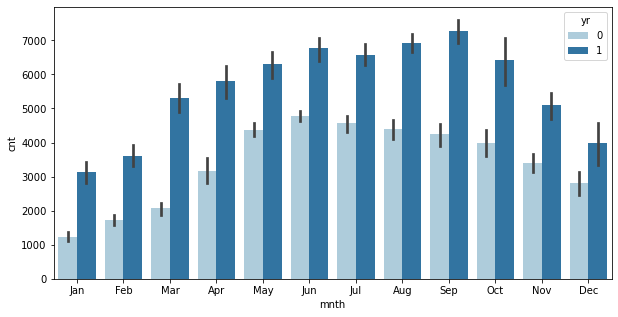

In [12]:
# mnth has 12 unique values, adding labels and comparing against target variable
def month(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })
df[['mnth']] = df[['mnth']].apply(month)
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=df,palette='Paired')

Most bikes are rented during june to september period.

<AxesSubplot:xlabel='season', ylabel='cnt'>

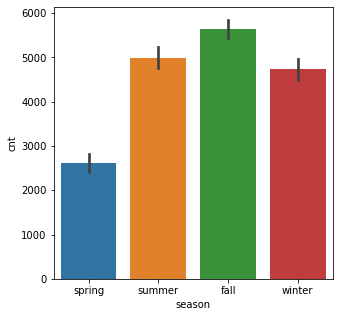

In [13]:
# Seasons v/s Target
def season_fn(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

df[['season']]= df[['season']].apply(season_fn)
plt.figure(figsize=(5,5))
sns.barplot('season','cnt',data=df)

As observed in months most bikes are rented during fall season

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

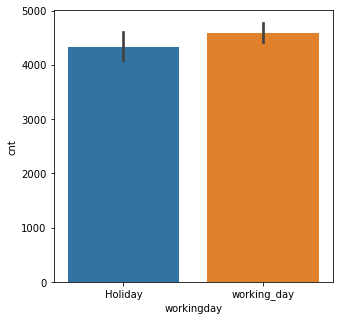

In [14]:
# Day v/s cnt
day = {1:'working_day',0:'Holiday'}
df['workingday'] = df['workingday'].map(day)
plt.figure(figsize=(5,5))
sns.barplot('workingday','cnt',data=df)

There is not much difference but more bikes are rented during working days

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

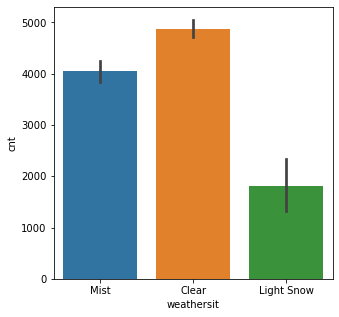

In [15]:
# Weather v/s cnt
def weather(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

df[['weathersit']] = df[['weathersit']].apply(weather)
plt.figure(figsize=(5,5))
sns.barplot('weathersit','cnt',data=df)

Clear weather is more preffered by riders for renting

In [16]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [17]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Saturday,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sunday,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Monday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tuesday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wednesday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


Performing EDA on Numerical Variables

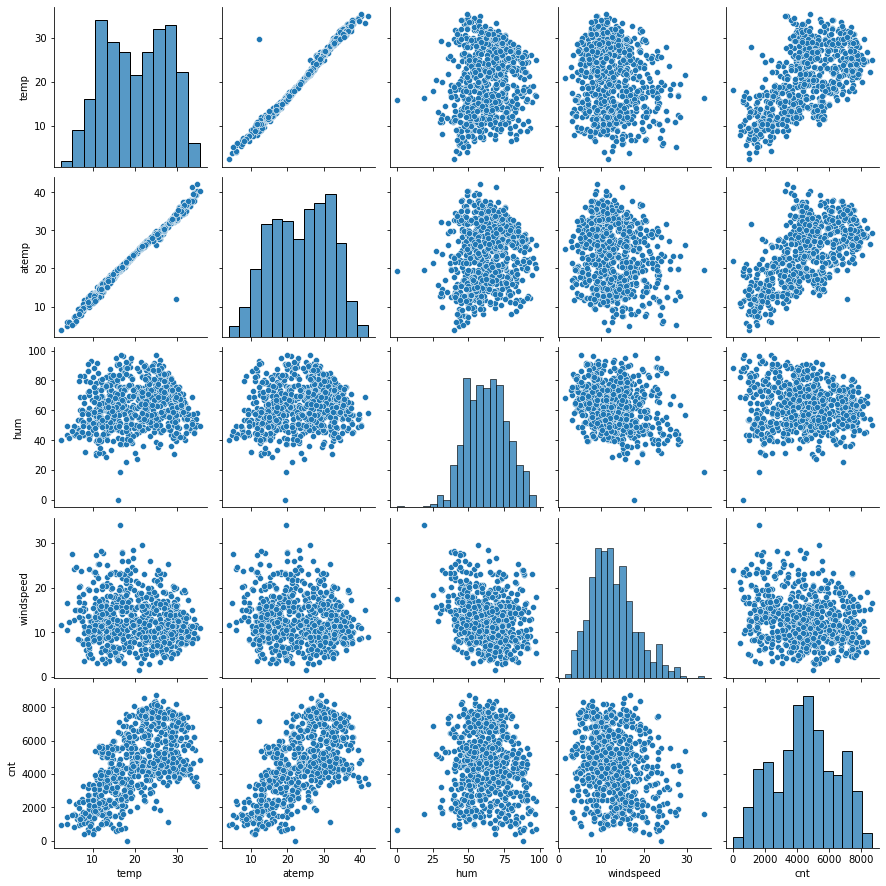

In [18]:
# Pair-plot between numerical variables
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

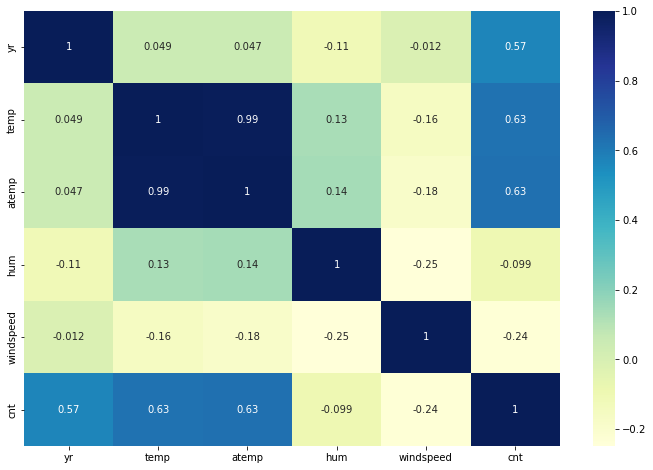

In [19]:
#Heat-Map for correlation
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


temp and atemp variables are highly correlated (~ 1). Therefore dropping atemp.

In [20]:
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Saturday,Holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Sunday,Holiday,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Monday,working_day,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Tuesday,working_day,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Wednesday,working_day,Clear,9.305237,43.6957,12.522300,1600


EDA on Categorical Variables

In [21]:
#Categorical variable list
cat = df.select_dtypes(exclude=['float64','int64','datetime64'])
cat.head()

,season,mnth,weekday,workingday,weathersit
0,spring,Jan,Saturday,Holiday,Mist
1,spring,Jan,Sunday,Holiday,Mist
2,spring,Jan,Monday,working_day,Clear
3,spring,Jan,Tuesday,working_day,Clear
4,spring,Jan,Wednesday,working_day,Clear


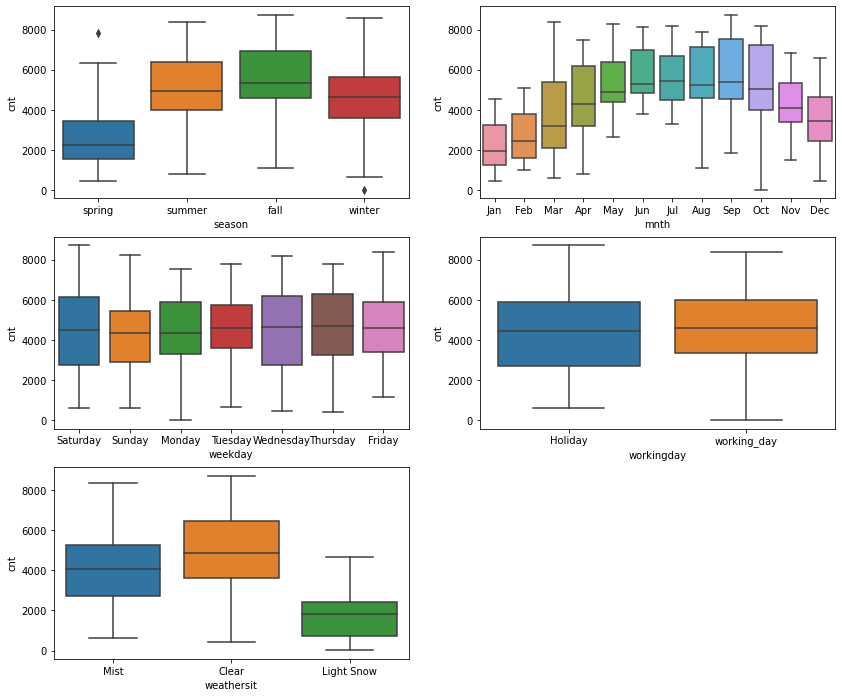

In [22]:
plt.figure(figsize=(14,12))

plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt',data=df)

plt.subplot(3,2,2)
sns.boxplot(x='mnth', y='cnt',data=df)

plt.subplot(3,2,3)
sns.boxplot(x='weekday', y='cnt',data=df)

plt.subplot(3,2,4)
sns.boxplot(x='workingday', y='cnt',data=df)

plt.subplot(3,2,5)
sns.boxplot(x='weathersit', y='cnt',data=df)


plt.show();

## Dummy Variables 

- Dummy variables are created to represent categorical variables in binary form.
- Creating dummy variables for season, mnth, weekday, workingday and weathersit.

In [23]:
df_dummies = pd.get_dummies(cat, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [24]:
# Checking the columns in list
list(cat.columns)

['season', 'mnth', 'weekday', 'workingday', 'weathersit']

In [25]:
# Dropping the categorical columns to keep dummy variables
df = df.drop(list(cat.columns), axis=1)
df.head()

,yr,temp,hum,windspeed,cnt
0,0,14.110847,80.5833,10.749882,985
1,0,14.902598,69.6087,16.652113,801
2,0,8.050924,43.7273,16.636703,1349
3,0,8.200000,59.0435,10.739832,1562
4,0,9.305237,43.6957,12.522300,1600


In [26]:
# Adding dummies to the original data
df = pd.concat([df,df_dummies], axis=1)
df.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Scaling 

Scaling ensures consistency of input feature range and improves algorithm performance.

In [27]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 42)

In [28]:
# Applying scaler
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.transform(df_test[num_vars])

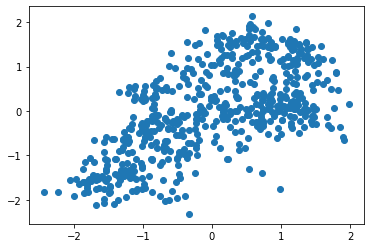

In [29]:
# Checking the scaling
plt.figure(figsize=(6,4))
plt.scatter('temp','cnt',data=df_train)

In [30]:
# x and y train and test sets

y_train = df_train.pop('cnt')
x_train = df_train

y_test = df_test.pop('cnt')
x_test = df_test

## Model Building

In [31]:
# Adding Constant to x_train
x_train_sm = sm.add_constant(x_train)

In [32]:
# Model Fit
lr = sm.OLS(y_train,x_train_sm).fit()

In [33]:
# Checking the parameters 
lr.params

const                    -0.599574
yr                        1.009269
temp                      0.439871
hum                      -0.105795
windspeed                -0.111245
season_spring            -0.511817
season_summer             0.053907
season_winter             0.390998
mnth_Aug                 -0.060988
mnth_Dec                 -0.225217
mnth_Feb                 -0.031575
mnth_Jan                 -0.089935
mnth_Jul                 -0.216089
mnth_Jun                 -0.015597
mnth_Mar                  0.178043
mnth_May                  0.124420
mnth_Nov                 -0.287064
mnth_Oct                  0.071826
mnth_Sep                  0.278450
weekday_Monday           -0.107132
weekday_Saturday          0.312647
weekday_Sunday            0.077892
weekday_Thursday         -0.041910
weekday_Tuesday          -0.071663
weekday_Wednesday        -0.005941
workingday_working_day    0.300737
weathersit_Light Snow    -1.088249
weathersit_Mist          -0.227453
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     110.9
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.62e-204
Time:                        13:18:57   Log-Likelihood:                -287.24
No. Observations:                 584   AIC:                             630.5
Df Residuals:                     556   BIC:                             752.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

- Using Method of Least Sqaures we got R-squared:0.843 and Adj. R-squared:0.836
- We will drop some variables using the RFE method to obtain a well-fitted model.

In [35]:
# Fitting regressor to x and y train
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [36]:
# Creating prediction set 
y_pred = regressor.predict(x_test)
df1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [37]:
df1.head()

,Actual,Predicted
468,1.491588,0.851376
148,0.123703,-0.121052
302,-0.622184,-0.476830
355,-0.756822,-1.378946
515,1.429133,1.369513


### Recursive feature elimination(RFE)

In [38]:
estimator = LinearRegression()

In [39]:
# Checking current number of columns
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 27)
(146, 27)
(584,)
(146,)


In [40]:
# Selecting 15 features
rfe = RFE(estimator, n_features_to_select=15)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 11),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 13),
 ('workingday_working_day', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [42]:
print((rfe.support_==True).sum())
print((rfe.support_==False).sum())

15
12


In [43]:
rfe_sup= x_train.columns[rfe.support_]
rfe_sup

Index(['yr', 'temp', 'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jul',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'workingday_working_day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [44]:
# Modified x_train
x_train_rfe = x_train[rfe_sup]
x_train_rfe.head()

,yr,temp,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Mar,mnth_May,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,workingday_working_day,weathersit_Light Snow,weathersit_Mist
247,0,0.941813,0,0,0,0,0,0,0,1,0,0,0,0,1
335,0,-1.029248,0,1,1,0,0,0,0,0,0,0,1,0,0
702,1,-0.142044,0,1,1,0,0,0,0,0,0,0,1,0,0
440,1,0.068329,1,0,0,0,1,0,0,0,1,0,0,0,1
136,0,0.329003,0,0,0,0,0,1,0,0,0,0,1,0,1


In [45]:
# Creating functions for Model building and VIF calculation
def model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

1st Iteration

In [46]:
x_train_new = model(x_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     182.8
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.38e-206
Time:                        13:19:00   Log-Likelihood:                -314.03
No. Observations:                 584   AIC:                             660.1
Df Residuals:                     568   BIC:                             730.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [47]:
VIF(x_train_new)

,Features,VIF
0,const,37.34
13,workingday_working_day,7.25
12,weekday_Sunday,4.84
11,weekday_Saturday,4.71
2,temp,3.31
3,season_spring,2.95
4,season_winter,2.28
9,mnth_Nov,1.69
6,mnth_Jul,1.42
5,mnth_Dec,1.29


workingday_working_day is a highly correlated variable. Dropping workingday_working_day.

In [48]:
x_train1= x_train_rfe.drop(["workingday_working_day"], axis = 1)

2nd Iteration

In [49]:
x_train_new = model(x_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     191.6
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.07e-204
Time:                        13:19:01   Log-Likelihood:                -319.68
No. Observations:                 584   AIC:                             669.4
Df Residuals:                     569   BIC:                             734.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [50]:
x_train1= sm.add_constant(x_train1)
x_train_new= x_train1.drop('const',axis=1)
VIF(x_train_new)


,Features,VIF
1,temp,2.83
2,season_spring,2.52
3,season_winter,2.42
0,yr,1.82
8,mnth_Nov,1.79
5,mnth_Jul,1.49
13,weathersit_Mist,1.46
4,mnth_Dec,1.39
9,mnth_Sep,1.20
11,weekday_Sunday,1.17


All the VIF values are below 5

### Residual Analysis

Plotting y - y predicted to get error terms distibution

In [51]:
lm1 = sm.OLS(y_train,x_train1).fit()
y_train_pred = lm1.predict(x_train1)

Text(0.5, 0, 'Errors')

<Figure size 432x288 with 0 Axes>

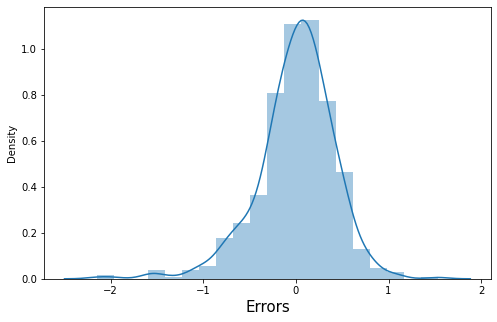

In [52]:
fig = plt.figure()
plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)               
plt.xlabel('Errors', fontsize = 15) 

### Model Evaluation 

In [53]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

# Prediction
y_test_pred = lm1.predict(x_test_new) 

Text(0, 0.5, 'y_pred')

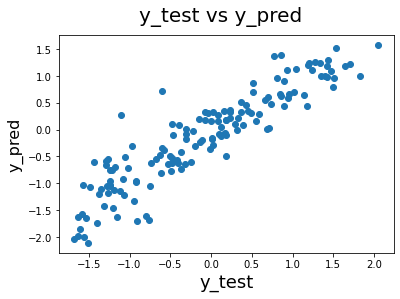

In [54]:
# Plotting y_test v/s y_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

### R2 score 

In [55]:
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, y_test_pred)*100,2),"%")

Test Performance: 83.23 %


R2 score of this model : 0.83

### Analysis generated by the Model

cnt = yr * 1.0329 + temp * 0.4256 + season_spring * -0.6009 + season_winter * 0.4303 + mnth_Dec * -0.2540 + mnth_Jul * -0.1719 + mnth_Mar * 0.2711 + mnth_May * 0.1461 + mnth_Nov * -0.3571 + mnth_Sep * 0.2457 + weekday_Saturday * 0.0732 + weekday_Sunday * -0.1788 + weathersit_Light Snow * -1.3520 + weathersit_Mist * -0.3477 + -0.3055

The Model is highly dependent on these variables: 
- Year
- temp
- Light Snow weather
- Spring Season
- Winter Season